# Prelude

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Telemetry

In [297]:
data = pd.read_parquet("ngao-logs.parquet")

In [298]:
data.tail()

,WfeRms,SegmentWfeRms,SegmentPiston,ResidualWfeRms,SegmentResidualWfeRms,SegmentResidualPiston
1995,[1.2247679705978953e-06],"[1.498865572102659e-06, 7.605528935528127e-07,...","[1.525358470644278e-06, 5.024273832532344e-07,...",[7.885672630436602e-07],"[1.2229506296534964e-07, 1.2161983420355682e-0...","[1.4882318737363676e-06, 5.167476615497435e-07..."
1996,[1.225321057063411e-06],"[1.5009460412329645e-06, 7.616644666086358e-07...","[1.5245487929860246e-06, 5.034198125031253e-07...",[7.854707746446365e-07],"[1.218674441361145e-07, 1.211161446690312e-07,...","[1.4875350871079718e-06, 5.177760158403544e-07..."
1997,[1.225727828568779e-06],"[1.50292521539086e-06, 7.627289164702233e-07, ...","[1.5234262491503614e-06, 5.042841735303227e-07...",[7.826243972886004e-07],"[1.21540537634246e-07, 1.2061504151006375e-07,...","[1.4867315485389554e-06, 5.187654323890456e-07..."
1998,[1.2262918289707159e-06],"[1.5052299886519904e-06, 7.637276553396077e-07...","[1.5226465848172666e-06, 5.05117554894241e-07,...",[7.800222761034092e-07],"[1.2135150484482438e-07, 1.2020809947443922e-0...","[1.4859558632451808e-06, 5.197202881390695e-07..."
1999,[1.2267306601643213e-06],"[1.5072117776071536e-06, 7.647409461242205e-07...","[1.5215390476441826e-06, 5.057061684965447e-07...",[7.776995403219189e-07],"[1.213848150882768e-07, 1.1994721660357754e-07...","[1.4851110563540715e-06, 5.207202207202499e-07..."


# Last step wavefronts

In [299]:
wavefront = pd.read_parquet("ngao-wavefront.parquet")
wavefront

,Wavefront,ReconWavefront,ResidualWavefront
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


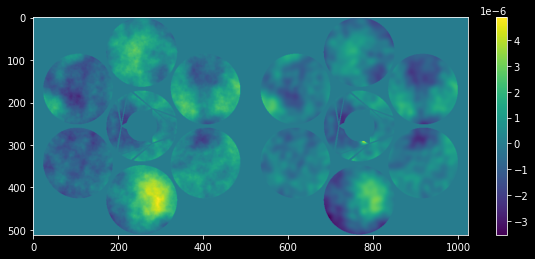

In [300]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.hstack([np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512),\
                      -np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512)]))
fig.colorbar(h,ax=ax)

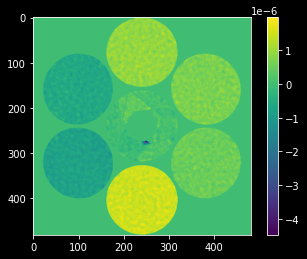

In [301]:
plt.imshow(np.vstack(wavefront["ResidualWavefront"])[-1].reshape(-1,60*8+1))
plt.colorbar()


# Wavefront RMS

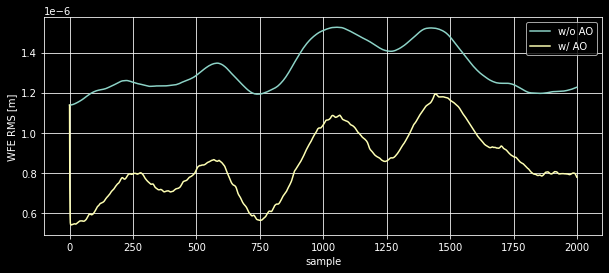

In [302]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.vstack(data["WfeRms"]),label='w/o AO')
ax.plot(np.vstack(data["ResidualWfeRms"]), label='w/ AO')
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("WFE RMS [m]")
ax.legend()


# Segment Wavefront RMS

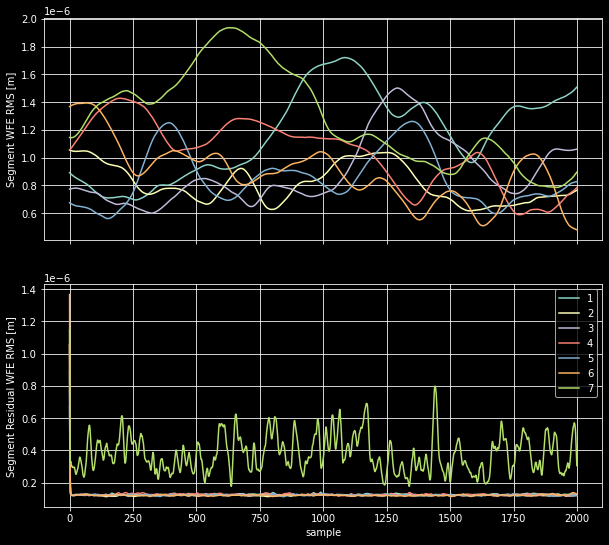

In [303]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentWfeRms"]))
ax.grid()
ax.set_ylabel("Segment WFE RMS [m]")
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualWfeRms"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual WFE RMS [m]")
ax.legend(range(1, 8))


# Segment Piston

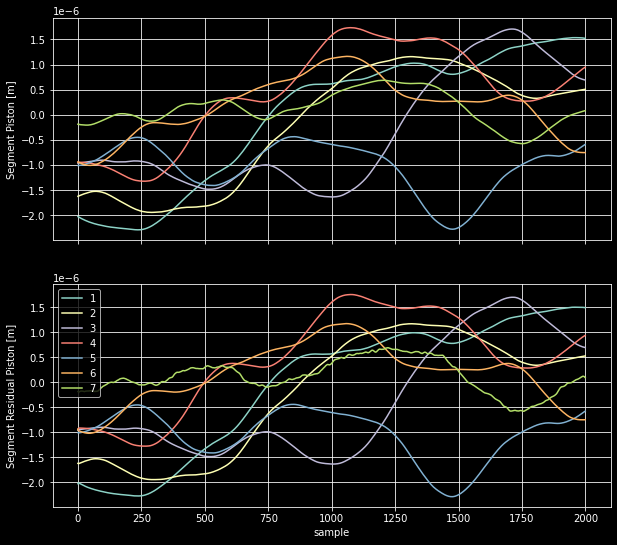

In [304]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentPiston"]))
ax.set_ylabel("Segment Piston [m]")
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualPiston"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual Piston [m]")
ax.legend(range(1, 8))


# Images

In [305]:
frame = pd.read_parquet("ngao-frame.parquet")
frame

,NaturalSeeingImage,DiffractionLimitedImage
0,"[1367949800.0, 1462756100.0, 1648188800.0, 167...","[1064986240.0, 1052594370.0, 1018227300.0, 113..."


## Natural Seeing image

(-0.5, 0.5)

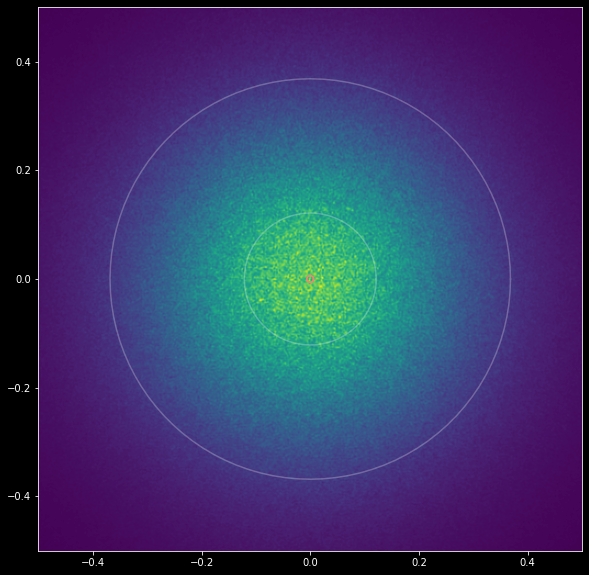

In [314]:
fig,ax = plt.subplots(figsize=(10,10))
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
ax.imshow(np.vstack(frame['NaturalSeeingImage']).reshape(512, -1),extent = [-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 60
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)


# Adaptive Optics image

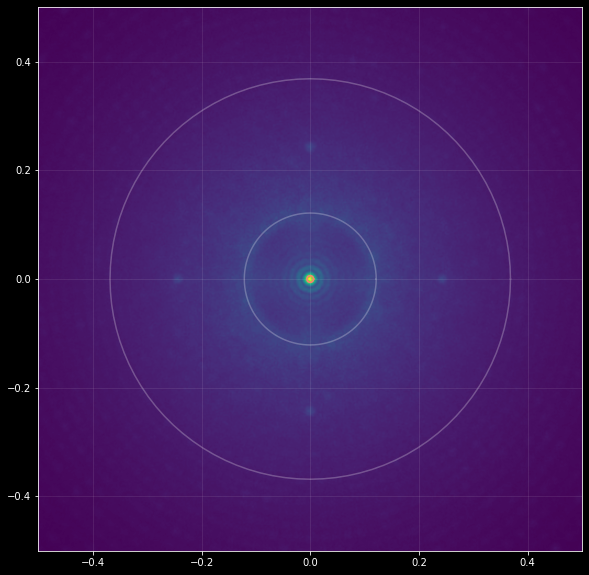

In [315]:
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.vstack(frame['DiffractionLimitedImage']).reshape(512, -1)**0.25,
          extent=[-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 60
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(alpha=0.1)


In [308]:
0.5e-6/(0.25/(180*3600/np.pi))


0.4125296124941927

In [309]:
25.5/60

0.425